In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting
%matplotlib inline

In [11]:
# Load CSV files
trip_df = pd.read_csv('C:/2.projects DA/self/z.industry level projects/uber/Uber Trip Details.csv')
location_df = pd.read_csv('C:/2.projects DA/self/z.industry level projects/uber/Location Table.csv')

# Display first 5 rows
trip_df.head()

,Trip ID,Pickup Time,Drop Off Time,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,Surge Fee,Vehicle,Payment_type
0,1,01-06-2024 00:42,01-06-2024 01:04,1,5.60,79,226,19.5,2.0,UberX,Uber Pay
1,2,01-06-2024 00:06,01-06-2024 00:13,1,1.72,142,186,8.0,0.0,Uber Black,Cash
2,3,01-06-2024 00:08,01-06-2024 00:21,1,3.41,229,238,13.0,0.0,Uber Black,Cash
3,4,01-06-2024 00:28,01-06-2024 00:37,1,1.81,188,35,9.0,0.0,UberX,Cash
4,5,01-06-2024 00:38,01-06-2024 00:45,1,1.89,100,137,8.0,0.0,Uber Black,Cash


In [13]:
# Basic Info
trip_df.info()
location_df.info()

# Summary statistics
trip_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103728 entries, 0 to 103727
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Trip ID          103728 non-null  int64  
 1   Pickup Time      103728 non-null  object 
 2   Drop Off Time    103728 non-null  object 
 3   passenger_count  103728 non-null  int64  
 4   trip_distance    103728 non-null  float64
 5   PULocationID     103728 non-null  int64  
 6   DOLocationID     103728 non-null  int64  
 7   fare_amount      103728 non-null  float64
 8   Surge Fee        103728 non-null  float64
 9   Vehicle          103728 non-null  object 
 10  Payment_type     103728 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 8.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LocationID  265 non-null   

,Trip ID,Pickup Time,Drop Off Time,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,Surge Fee,Vehicle,Payment_type
count,103728.000000,103728,103728,103728.000000,103728.000000,103728.000000,103728.000000,103728.000000,103728.000000,103728,103728
unique,NaN,32058,32218,NaN,NaN,NaN,NaN,NaN,NaN,5,4
top,NaN,29-06-2024 16:02,26-06-2024 16:31,NaN,NaN,NaN,NaN,NaN,NaN,UberX,Uber Pay
freq,NaN,15,16,NaN,NaN,NaN,NaN,NaN,NaN,38744,69530
mean,57422.229196,NaN,NaN,1.412136,3.363931,159.241410,153.537907,12.998337,1.979999,NaN,NaN
std,33812.530174,NaN,NaN,1.031418,3.192828,68.133216,73.585841,9.078582,2.421460,NaN,NaN
min,1.000000,NaN,NaN,1.000000,1.010000,1.000000,1.000000,2.500000,0.000000,NaN,NaN
25%,27899.750000,NaN,NaN,1.000000,1.530000,107.000000,87.000000,7.500000,0.000000,NaN,NaN
50%,56618.500000,NaN,NaN,1.000000,2.280000,151.000000,151.000000,10.000000,1.960000,NaN,NaN
75%,86859.250000,NaN,NaN,1.000000,3.800000,234.000000,233.000000,14.500000,3.000000,NaN,NaN


In [29]:
trip_df['Pickup Time'] = pd.to_datetime(trip_df['Pickup Time'], dayfirst=True, errors='coerce')
trip_df['Drop Off Time'] = pd.to_datetime(trip_df['Drop Off Time'], dayfirst=True, errors='coerce')

In [31]:
trip_df['trip_duration_minutes'] = (trip_df['Drop Off Time'] - trip_df['Pickup Time']).dt.total_seconds() / 60

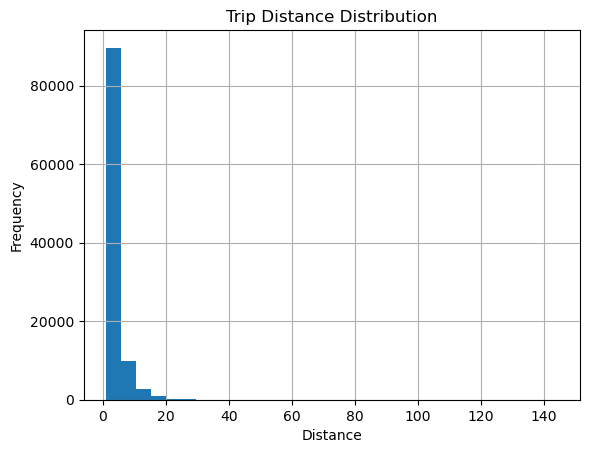

In [41]:
trip_df['trip_distance'].hist(bins=30)
plt.title('Trip Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

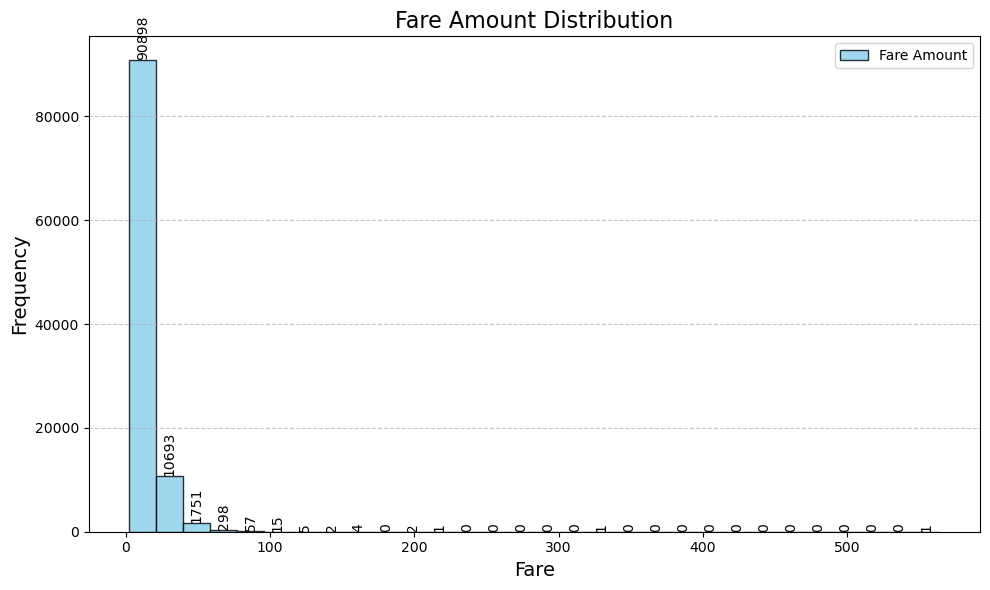

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Bigger, clearer chart
n, bins, patches = plt.hist(
    trip_df['fare_amount'], 
    bins=30,
    color='skyblue',
    edgecolor='black', 
    alpha=0.8, 
    label='Fare Amount'
)

plt.title('Fare Amount Distribution', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for count, bin_left, bin_right in zip(n, bins[:-1], bins[1:]):
    plt.text(
        (bin_left + bin_right) / 2, 
        count, 
        str(int(count)), 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        rotation=90
    )

plt.tight_layout()
plt.legend()
plt.show()

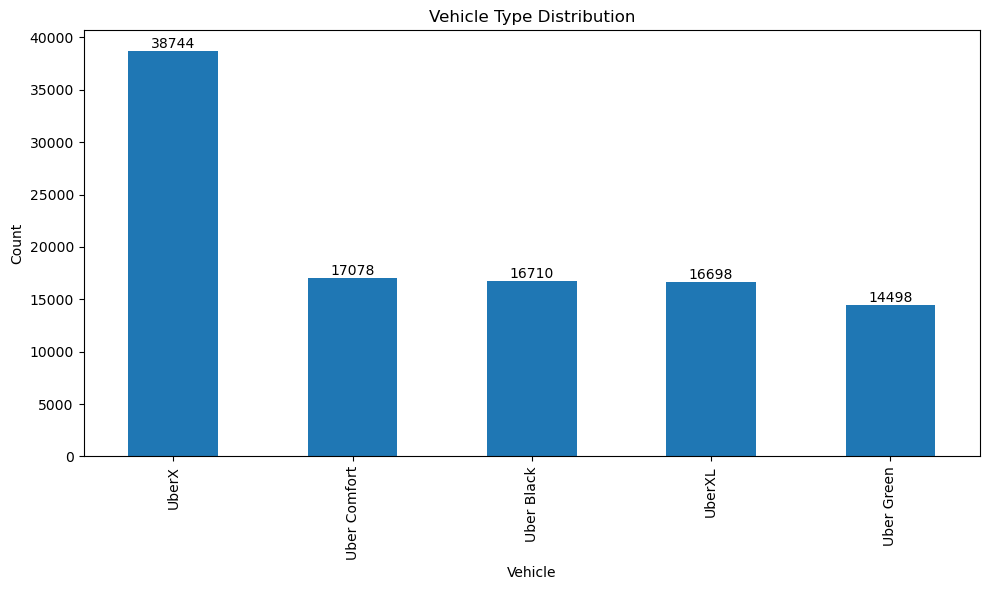

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

ax = trip_df['Vehicle'].value_counts().plot(kind='bar')

ax.bar_label(ax.containers[0])

plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle')
plt.ylabel('Count')
plt.tight_layout()  
plt.show()

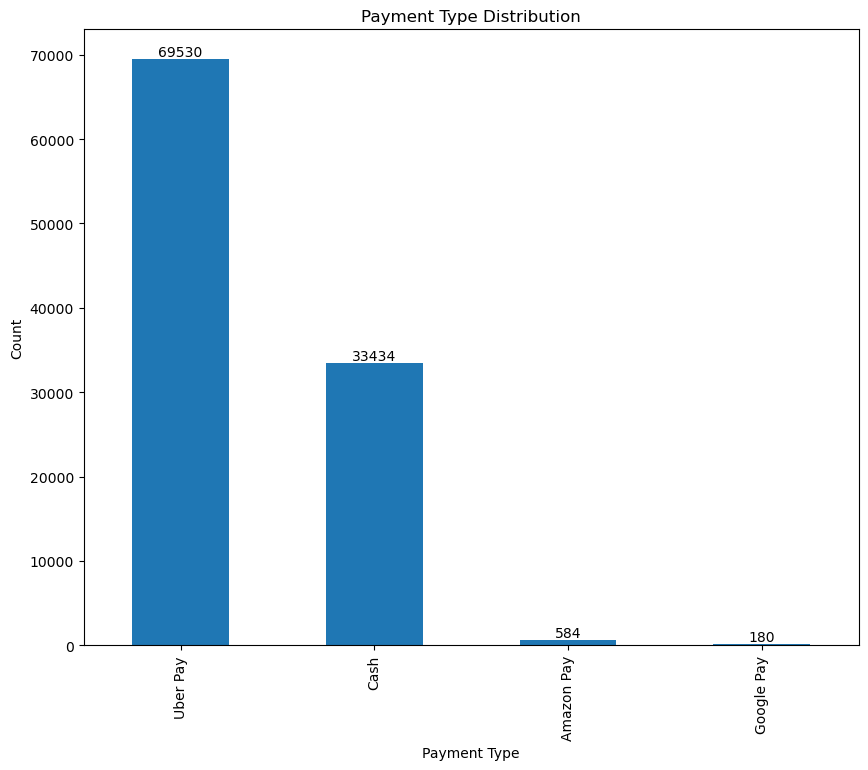

In [81]:
plt.figure(figsize=(10,8))
ax = trip_df['Payment_type'].value_counts().plot(kind='bar')

ax.bar_label(ax.containers[0])

plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

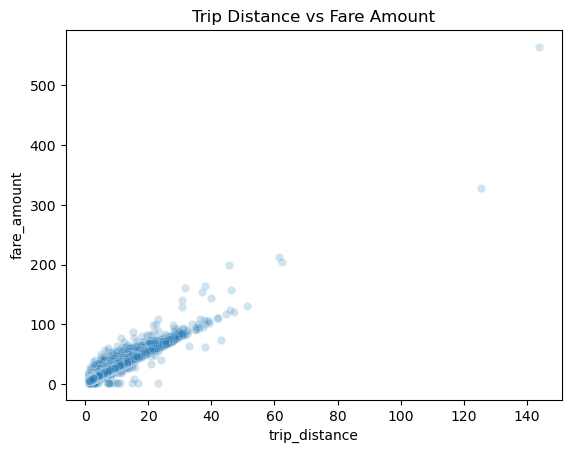

In [47]:
sns.scatterplot(x='trip_distance', y='fare_amount', data=trip_df, alpha=0.2)
plt.title('Trip Distance vs Fare Amount')
plt.show()

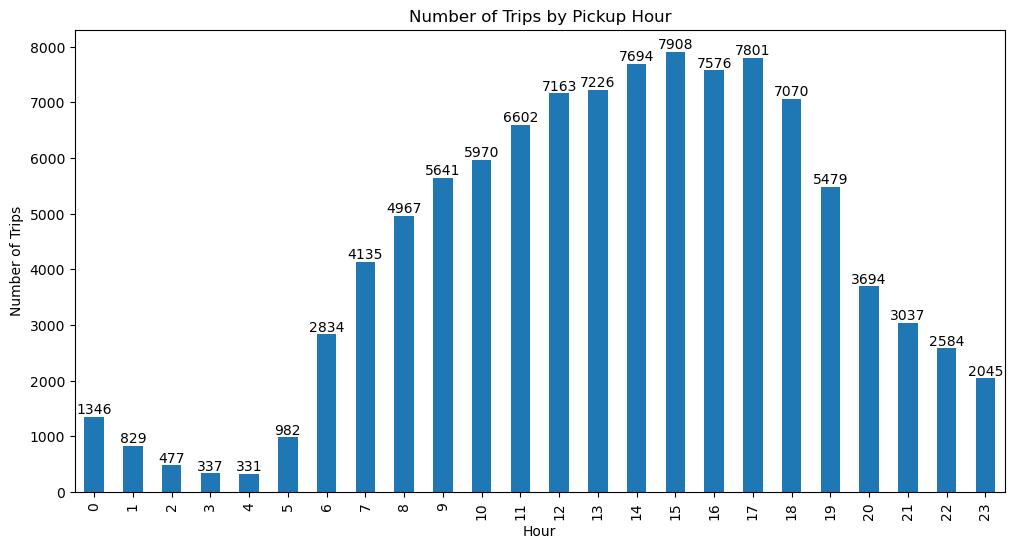

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
ax = trip_df.groupby('pickup_hour').size().plot(kind='bar')

ax.bar_label(ax.containers[0])

plt.title('Number of Trips by Pickup Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

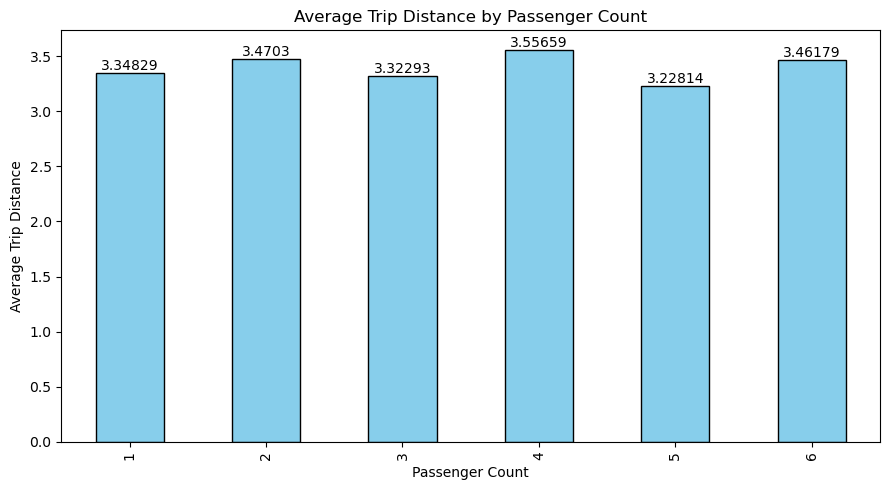

In [105]:
import matplotlib.pyplot as plt

avg_distance = trip_df.groupby('passenger_count')['trip_distance'].mean()

plt.figure(figsize=(9,5))
ax = avg_distance.plot(kind='bar', color='skyblue', edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title('Average Trip Distance by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Trip Distance')
plt.tight_layout()
plt.show()

City
Queens                75
Manhattan             69
Brooklyn              59
The Bronx             23
Bronx                 19
Staten Island         17
Newark, New Jersey     1
Name: count, dtype: int64


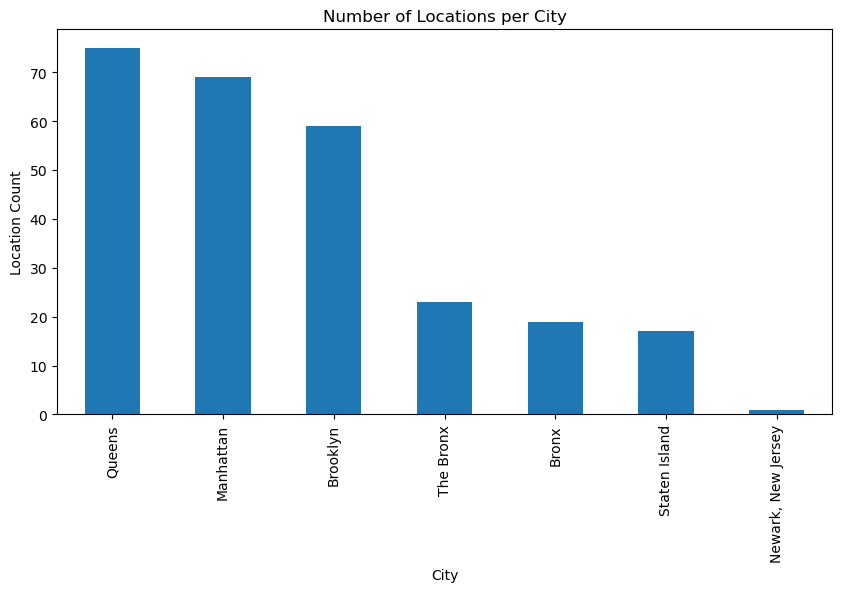

In [113]:
city_counts = location_df['City'].value_counts()
print(city_counts)
city_counts.plot(kind='bar', figsize=(10,5), title='Number of Locations per City')
plt.xlabel('City')
plt.ylabel('Location Count')
plt.show()

In [115]:
trip_df = trip_df.merge(location_df[['LocationID', 'Location', 'City']],
                        left_on='PULocationID', right_on='LocationID', how='left')
trip_df = trip_df.rename(columns={'Location': 'Pickup_Location', 'City': 'Pickup_City'})


trip_df = trip_df.merge(location_df[['LocationID', 'Location', 'City']],
                        left_on='DOLocationID', right_on='LocationID', how='left',
                        suffixes=('', '_Dropoff'))
trip_df = trip_df.rename(columns={'Location_Dropoff': 'Dropoff_Location', 'City_Dropoff': 'Dropoff_City'})

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

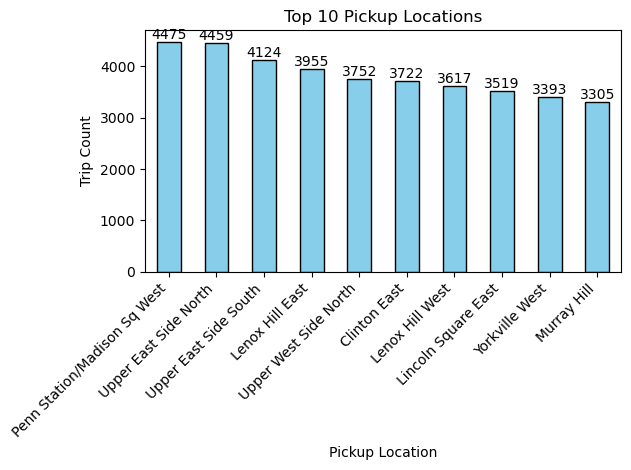

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

ax = top_pickups.plot(
    x='Location', y='Trip Count', kind='bar', legend=False, color='skyblue', edgecolor='black'
)

ax.bar_label(ax.containers[0])

plt.title('Top 10 Pickup Locations')
plt.xlabel('Pickup Location')
plt.ylabel('Trip Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()